In [1]:
import numpy as np
import pandas as pd
import lightgbm as ltb
import time
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
#ltb.LGBMRegressor
#ctb.CatBoostRegressor

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("train.csv")
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

In [5]:
data['log_loss'] = np.log(data['loss'])

In [6]:
seed = 7
test_size = 0.2

In [7]:
n_data = 50000

cont_X = data.iloc[0:n_data, 116:130]
cat_X = data.iloc[0:n_data, 0:116]
X = data.iloc[0:n_data, :130]

Y = data.iloc[0:n_data, 130:131]
log_Y = data.iloc[0:n_data, 131:132]

In [8]:
#Dummies encoding of categorical data - base

dummies_X = np.array(pd.get_dummies(cat_X))
new_X = np.c_[dummies_X, cont_X]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]

model = ltb.LGBMRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

base_pred = y_pred

Mean absolute error : 1186.352544165588
-- 6.0 seconds --


In [9]:
#Dummies encoding of categorical data - optimal

dummies_X = np.array(pd.get_dummies(cat_X))
new_X = np.c_[dummies_X, cont_X]

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

y_train = y_train.iloc[:,0]

model = ltb.LGBMRegressor(colsample_bytree=0.8411367740809124, max_depth=15,
                          min_child_samples=63, min_split_gain=0.06616105626244219,
                          num_leaves=138, subsample=0.775858544114288)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
print("Mean absolute error : " + str(mae))

Time = time.time() - start_time
print("-- " + str(Time) + " seconds --")

optimal_pred = y_pred

Mean absolute error : 1182.391828849768
-- 6.382999897 seconds --


In [10]:
compare = np.c_[np.exp(base_pred), np.exp(optimal_pred), np.exp(y_test)]
df = pd.DataFrame(compare)
df.columns = ["Predicted base", "Predicted optimal", "Actual Loss"]
df

,Predicted base,Predicted optimal,Actual Loss
0,2547.869834,2113.343168,2196.43
1,4227.468139,3837.191693,5027.91
2,3167.020932,3241.223168,3496.74
3,1520.571612,1644.404878,933.10
4,2525.762165,2975.281223,1435.14
5,1270.488468,1239.039708,678.54
6,1156.810520,1144.850540,1522.28
7,3365.325254,3359.353780,4129.68
8,1542.110489,1713.714111,992.61
9,1980.226614,1201.064762,2592.23


In [11]:
stepsize = 10000

In [12]:
#Base - all

T_b = []
MAE_b = []
N_b = []




for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_b.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor()
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_b.append(mae)

    Time = time.time() - start_time
    T_b.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [33]:
#T_b = [1.1800000667572021, 2.179999828338623,2.947999954223633,5.502000093460083,5.829999923706055,7.541000127792358,7.5299999713897705,8.628000020980835,9.624000012479248,11.106000185012817,11.568000078201294,13.996000051498413,18.792999982833862,20.736999988555908,24.412999868392944,34.61300015449524,30.10199999809265,36.7039999961853]

#MAE_b = [1187.65326664, 1204.03229211, 1174.62803829, 1161.69510025, 1175.14274586, 1148.91039598, 1150.14900234, 1141.65867466,1162.44375833, 1159.87900211, 1154.52714174, 1149.3344386 ,1156.89106943, 1160.66433663, 1138.45617642, 1152.91990661,1151.47438976, 1152.14254401]

#N_b = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000]

In [13]:
#Optimal - all

T_o = []
MAE_o = []
N_o = []




for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_o.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor(colsample_bytree=0.8411367740809124, max_depth=15, min_child_samples=63,
                              min_split_gain=0.06616105626244219, num_leaves=138, subsample=0.775858544114288)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_o.append(mae)

    Time = time.time() - start_time
    T_o.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [41]:
#T_o = [ 1.44799995,  2.14100003,  2.74000001,  3.77200007,  4.3440001, 6.38599992,  7.38499999,  8.15199995, 10.78999996, 12.43499994, 13.95200014, 15.46600008, 20.39199996, 24.42200017, 31.34100008, 30.16199994, 37.32400012, 35.79199982]

#MAE_o = [1206.98561666, 1221.07819137, 1187.10028787, 1173.37569849,1182.39182885, 1148.62072745, 1151.13566926, 1137.00913212,1156.91172007, 1151.67647092, 1144.41287615, 1138.4156369 ,1149.31046316, 1151.75689897, 1130.11692799, 1144.38281965, 1142.29872249, 1145.51173878]

#N_o = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000]

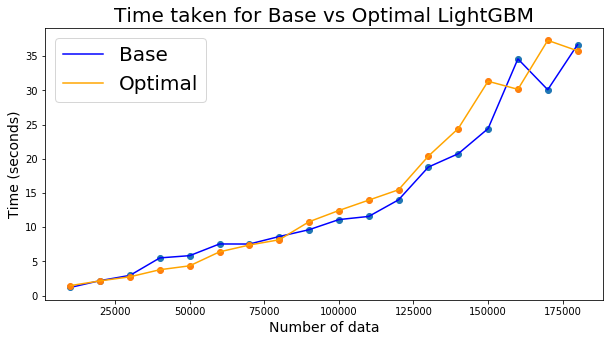

In [14]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_b, T_b, 'o')
ax.plot(N_b, T_b, 'blue', label = 'Base')
ax.plot(N_o, T_o, 'o')
ax.plot(N_o, T_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal LightGBM', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

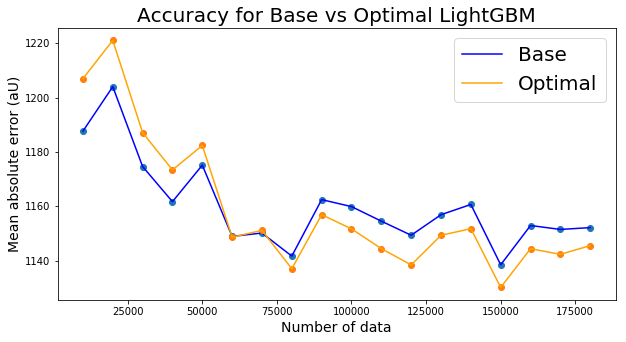

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_b, MAE_b, 'o')
ax.plot(N_b, MAE_b, 'blue', label = 'Base')
ax.plot(N_o, MAE_o, 'o')
ax.plot(N_o, MAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal LightGBM', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [25]:
# Categorical - base

catT_b = []
catMAE_b = []
catN_b = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    catN_b.append(n_data)
    
    #cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor()
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    catMAE_b.append(mae)

    Time = time.time() - start_time
    catT_b.append(Time)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [44]:
#catT_b = [ 0.72599983,  1.26800013,  2.19699979,  2.70300007,  3.25500011,3.91600013,  4.11400008,  5.55099988,  5.08800006,  5.81299996,6.22199988,  6.85000014,  7.88900018,  8.15400004,  8.62899995, 9.99900007, 10.19400001, 10.52699995]

#catMAE_b = [1200.93449648, 1215.60865256, 1200.72644099, 1176.61178942,1186.35254417, 1165.54472698, 1169.84570118, 1157.25461158,1183.80470128, 1178.0550995 , 1173.28964131, 1165.78748379,1175.67411177, 1178.97123227, 1160.09812111, 1175.99134346,1174.6208417 , 1172.57714813]

#catN_b = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000]

In [26]:
# Categorical - optimal 

catT_o = []
catMAE_o = []
catN_o = []




for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    catN_o.append(n_data)
    
    #cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor(colsample_bytree=0.5802084731192257, max_depth=16, 
                              min_child_samples=67, min_split_gain=0.050331348713844225, 
                              num_leaves=126, subsample=0.6778482209788528)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    catMAE_o.append(mae)

    Time = time.time() - start_time
    catT_o.append(Time)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [48]:
#catT_o =  [ 0.58200002,  1.1099999 ,  1.5999999 ,  2.18199992,  2.75099993,3.16799998,  3.95499992,  4.35599995,  5.2650001 ,  5.58100009,7.02600002,  6.898     ,  8.13100004,  8.17400002,  9.42799997,9.29200006, 10.15799999, 11.34699988]
    
#catMAE_o = [1212.06349245, 1216.3279367 , 1198.56019434, 1178.92583716,1183.46288185, 1157.07229349, 1165.18640925, 1149.06568806,1175.6866122 , 1172.08183593, 1159.79572088, 1154.93331987,1164.19159389, 1168.62200329, 1147.78978975, 1164.61471032,1161.50465959, 1160.79529775]

#catN_o = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000]

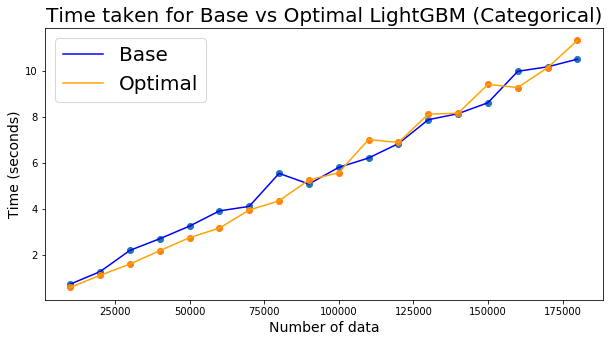

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(catN_b, catT_b, 'o')
ax.plot(catN_b, catT_b, 'blue', label = 'Base')
ax.plot(catN_o, catT_o, 'o')
ax.plot(catN_o, catT_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal LightGBM (Categorical)', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

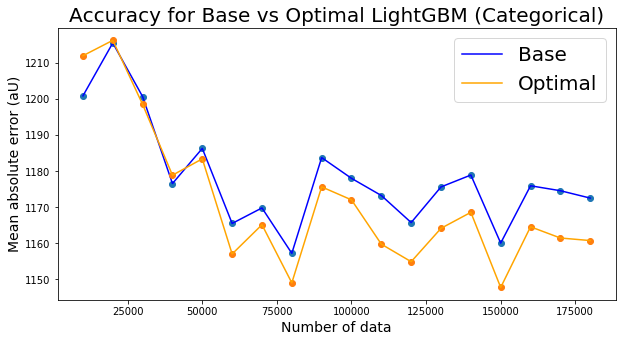

In [29]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(catN_b, catMAE_b, 'o')
ax.plot(catN_b, catMAE_b, 'blue', label = 'Base')
ax.plot(catN_o, catMAE_o, 'o')
ax.plot(catN_o, catMAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal LightGBM (Categorical)', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

In [18]:
# Continuous - base

contT_b = []
contMAE_b = []
contN_b = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    contN_b.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    #cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    #dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cont_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor()
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    contMAE_b.append(mae)

    Time = time.time() - start_time
    contT_b.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [51]:
#contT_b = [0.3579998 , 0.4920001 , 0.44900012, 0.50999999, 0.55299997, 0.625, 0.66300011, 0.73900008, 0.79400015, 0.85, 0.90399981, 1.01999998, 1.04399991, 1.13599992, 1.2110002 ,1.29200006, 1.33800006, 1.42799997]

#contMAE_b = [1814.50484733, 1762.36059665, 1783.88006333, 1759.99535016, 1777.75447501, 1729.97682418, 1765.91140674, 1729.93669343,1775.09395566, 1760.28485457, 1750.2606867 , 1739.51852378,1745.14584539, 1748.8583637 , 1741.99744116, 1756.17703495,1752.52350219, 1754.88829824]

#contN_b = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000]

In [19]:
# Continuous - optimal

contT_o = []
contMAE_o = []
contN_o = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    contN_o.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    #cat_X = data.iloc[0:n_data, 0:116]
    #X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    #dummies_X = np.array(pd.get_dummies(cat_X))
    #new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(cont_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = ltb.LGBMRegressor(colsample_bytree=0.5968856073056711, max_depth=13, 
                              min_child_samples=72, min_split_gain=0.04585034601735875, 
                              num_leaves=44, subsample= 0.6476605593809661)
    
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    contMAE_o.append(mae)

    Time = time.time() - start_time
    contT_o.append(Time)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [54]:
#contT_o = [0.28800011, 0.37899995, 0.45000005, 0.49300003, 0.5400002 ,0.59299994, 0.6559999 , 0.69099998, 0.7809999 , 0.82500005,0.86199999, 0.93099999, 0.97899985, 1.04399991, 1.125     ,1.18200016, 1.35699987, 1.41100001]

#contMAE_o = [1814.94582255, 1763.19446601, 1784.91742558, 1765.46749676,1778.17436367, 1728.81254559, 1765.35260552, 1728.97892376,1772.49439756, 1759.56026182, 1748.99894566, 1737.72413971,1744.66348186, 1747.42878141, 1741.14623924, 1755.12406333,1750.79223979, 1752.82307617]

#contN_o = [ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000]

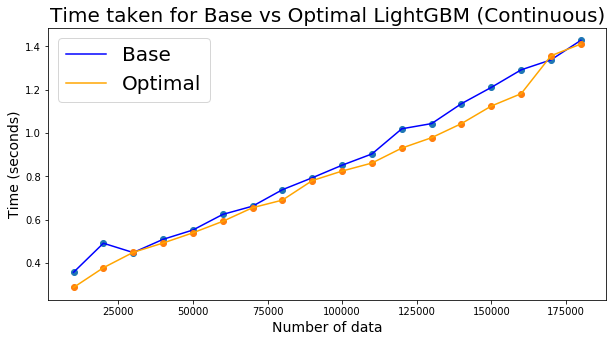

In [30]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(contN_b, contT_b, 'o')
ax.plot(contN_b, contT_b, 'blue', label = 'Base')
ax.plot(contN_o, contT_o, 'o')
ax.plot(contN_o, contT_o, 'orange', label = 'Optimal')
ax.set_title('Time taken for Base vs Optimal LightGBM (Continuous)', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

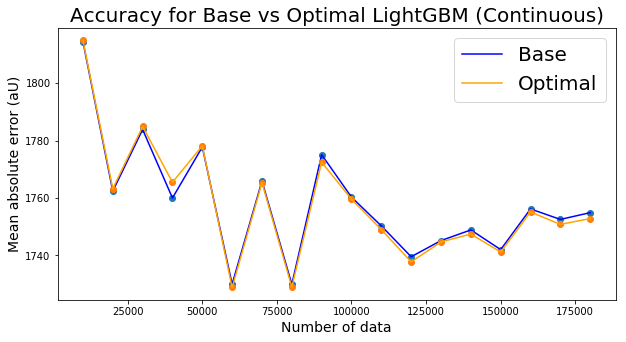

In [31]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(contN_b, contMAE_b, 'o')
ax.plot(contN_b, contMAE_b, 'blue', label = 'Base')
ax.plot(contN_o, contMAE_o, 'o')
ax.plot(contN_o, contMAE_o, 'orange', label = 'Optimal')
ax.set_title('Accuracy for Base vs Optimal LightGBM (Continuous)', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()